In [1]:
##import necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata
import seaborn as sns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
##read file
df = pd.read_csv('Pre-Covid19_Data_Trimmed.csv')

In [3]:
##data exploration
df.shape

(68110, 16)

In [4]:
df.head(3)

,Unnamed: 0,Date_Occurred,Time_Occurred,Area_ID,Area_Name,MO_Codes,Victim_Age,Victim_Sex,Victim_Descent,Address,Cross_Street,Location,Latitude,Longitude,Month,Year
0,0,2019-01-01,1033,7,Wilshire,3004 3028 3030 3037 3101 3401 3701 4027 3035,23.0,Male,White,CRENSHAW,WASHINGTON,"(34.0399, -118.3311)",34.0399,-118.3311,1,2019
1,1,2019-01-01,200,13,Newton,3101 3401 3701 3004 3030 3036,49.0,Female,Black,59TH ST,BROADWAY,"(33.9869, -118.2783)",33.9869,-118.2783,1,2019
2,2,2019-01-01,2250,14,Pacific,3003 3025 3029 3035 3037 3101 3401 3701 4027,33.0,Male,White,VICKSBURG,CENTURY,"(33.942, -118.4095)",33.9420,-118.4095,1,2019


In [5]:
##clean up data a bit
columns_to_drop=['Unnamed: 0', 'Location']

In [6]:
df = df.drop(columns_to_drop,axis=1)

In [7]:
df.head(3)

,Date_Occurred,Time_Occurred,Area_ID,Area_Name,MO_Codes,Victim_Age,Victim_Sex,Victim_Descent,Address,Cross_Street,Latitude,Longitude,Month,Year
0,2019-01-01,1033,7,Wilshire,3004 3028 3030 3037 3101 3401 3701 4027 3035,23.0,Male,White,CRENSHAW,WASHINGTON,34.0399,-118.3311,1,2019
1,2019-01-01,200,13,Newton,3101 3401 3701 3004 3030 3036,49.0,Female,Black,59TH ST,BROADWAY,33.9869,-118.2783,1,2019
2,2019-01-01,2250,14,Pacific,3003 3025 3029 3035 3037 3101 3401 3701 4027,33.0,Male,White,VICKSBURG,CENTURY,33.9420,-118.4095,1,2019


In [8]:
##convert pandas dataframe to geodataframe
df = gpd.GeoDataFrame(df, 
                     crs='EPSG:4326',
                     geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [9]:
##convert lat/lon to floats

df.Longitude = df.Longitude.astype('float')
df.Latitude = df.Latitude.astype('float')

In [10]:
##drop the unmapped rows
df.drop(df[df.Longitude==0].index,inplace=True)

In [11]:
## project to web mercator
##df=df.to_crs('EPSG:3857')

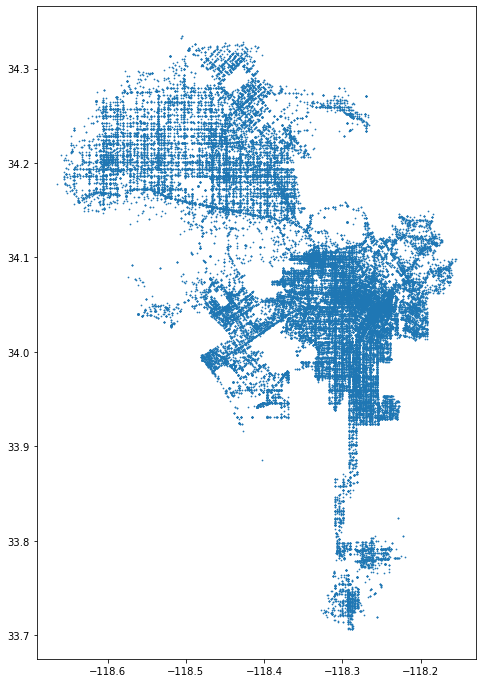

In [12]:
##this plot is the traffic collisions point in LA city.
df.plot(figsize=(12,12),
             markersize=0.5)

In [13]:
## create a function
def traffic_collisions_by(race='Black'):
    # table
    display(df[df.Victim_Descent == race].head()) 
    
    # map
    ax = df[df.Victim_Descent == race].plot(figsize=(9,9), markersize=2)
    
    # axis
    ax.axis('off')
    
    # basemap
    ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.CartoDB.DarkMatter)

,Date_Occurred,Time_Occurred,Area_ID,Area_Name,MO_Codes,Victim_Age,Victim_Sex,Victim_Descent,Address,Cross_Street,Latitude,Longitude,Month,Year,geometry
0,2019-01-01,1033,7,Wilshire,3004 3028 3030 3037 3101 3401 3701 4027 3035,23.0,Male,White,CRENSHAW,WASHINGTON,34.0399,-118.3311,1,2019,POINT (-118.33110 34.03990)
2,2019-01-01,2250,14,Pacific,3003 3025 3029 3035 3037 3101 3401 3701 4027,33.0,Male,White,VICKSBURG,CENTURY,33.9420,-118.4095,1,2019,POINT (-118.40950 33.94200)
8,2019-01-01,1125,21,Topanga,3004 3037 3034 3026 3101 3401 3701 4026,25.0,Male,White,PLATT AV,CALVERT ST,34.1816,-118.6430,1,2019,POINT (-118.64300 34.18160)
10,2019-01-01,720,21,Topanga,3011 3025 3034 3037 3101 3401 3701 4026 3039,NaN,Male,White,ROSCOE BL,WINNETKA AV,34.2202,-118.5710,1,2019,POINT (-118.57100 34.22020)
11,2019-01-01,1,21,Topanga,3037 4026 3011 3034 3028 3030 3101 3401 3701,NaN,Male,White,VENTURA BL,FALLBROOK AV,34.1657,-118.6233,1,2019,POINT (-118.62330 34.16570)


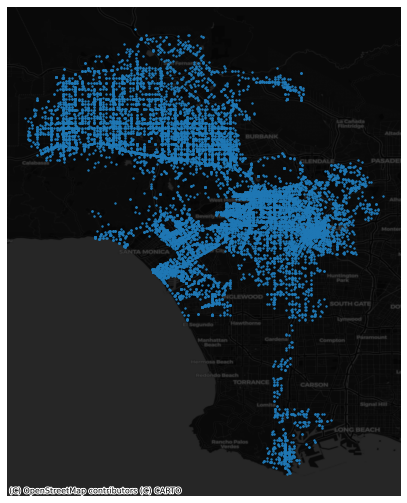

In [14]:
traffic_collisions_by(race='White')

In [15]:
##i will make an interactive function for traffic collisions by race
top_25_race = df.Victim_Descent.value_counts().head(25).index.tolist()

@interact

def traffic_collisions_by(race=top_25_race):
    
    ##table
    display(df[df.Victim_Descent == race].head()) 

    ##map
    ax = df[df.Victim_Descent == race].plot(figsize=(9,9), markersize=10)
    
    ##make axis off
    ax.axis('off')

    ##include basemap
    ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.CartoDB.DarkMatter)

interactive(children=(Dropdown(description='race', options=('Hispanic, Latin, Mexican', 'White', 'Black', 'Oth…

In [16]:
##i want to create an interactive map with two drop-downs: race and area.

top_25_race = df.Victim_Descent.value_counts().head(25).index.tolist()

@interact

##function argument will become interactive
def traffic_collisions_by(race=top_25_race,
                         area = df.Area_Name.unique().tolist()):
    
    ##table
    display(df[(df.Victim_Descent == race)&(df.Area_Name == area)].head()) 

    ##map
    ax = df[(df.Victim_Descent == race)&(df.Area_Name == area)].plot(figsize=(9,9), markersize=10)
    
    ##axis
    ax.axis('off')

    ##include a basemap
    ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.CartoDB.DarkMatter)

interactive(children=(Dropdown(description='race', options=('Hispanic, Latin, Mexican', 'White', 'Black', 'Oth…

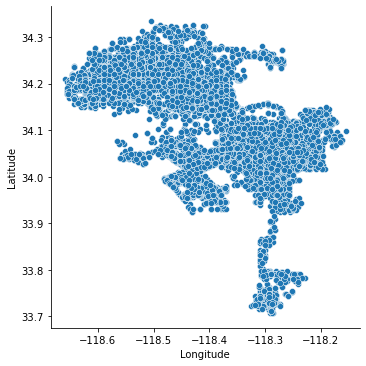

In [17]:
##this is a seaborn plot of traffic collisions from people of white descent
data_white = df[df.Victim_Descent.isin(['White'])]
sns.relplot(data = data_white,
              x='Longitude', 
              y='Latitude')

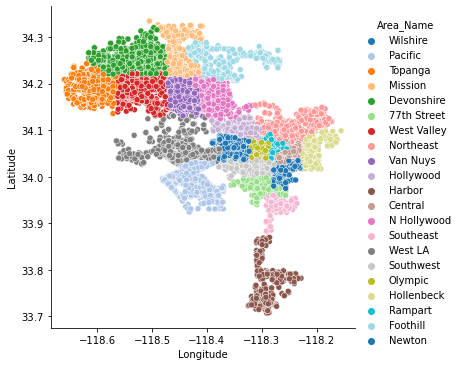

In [18]:
sns.relplot(data=data_white,
            x='Longitude', 
            y='Latitude',
            hue='Area_Name',
            palette='tab20')

In [19]:
##i am creating an interactive feature with area name as drop-down and with victim sex in legend
@interact

def traffic_analysis(area = df.Area_Name.unique().tolist()):
    sns.relplot(data=df[df['Area_Name']==area],
            x='Longitude', 
            y='Latitude',
            hue='Victim_Sex',
            style='Victim_Sex')

interactive(children=(Dropdown(description='area', options=('Wilshire', 'Newton', 'Pacific', 'West LA', 'Footh…

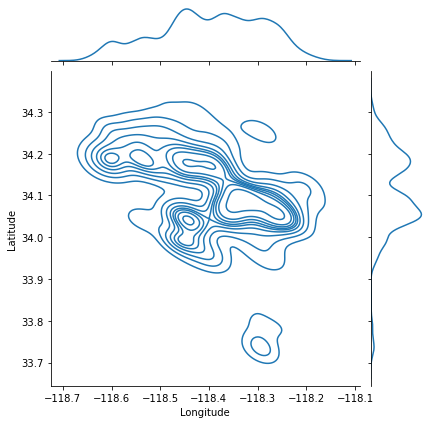

In [20]:
##perform a kde plot for white descent

sns.jointplot(data = data_white,
              x='Longitude', 
              y='Latitude', 
              kind='kde')

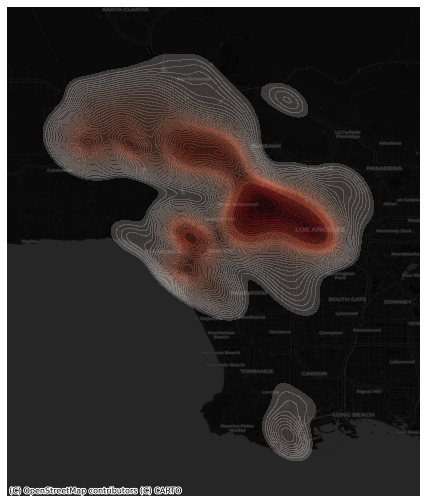

In [21]:
##perform a heat map for white desscent

f, ax = plt.subplots(1, figsize=(9, 9))

sns.kdeplot(x = data_white.Longitude, 
            y = data_white.Latitude,
            n_levels=50, 
            shade=True,
            thresh=0.05,
            alpha=0.2, 
            cmap='Reds')
ax.axis('off')
ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.CartoDB.DarkMatter)

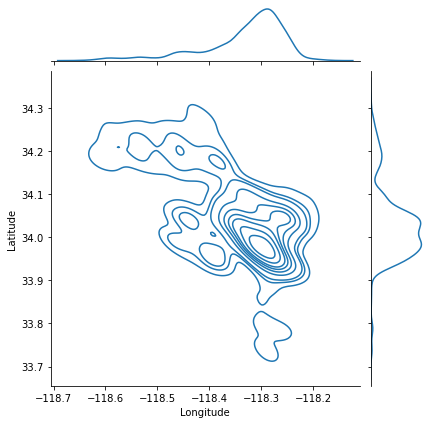

In [22]:
##perform a kde plot for black descent
data_black = df[df.Victim_Descent.isin(['Black'])]
sns.jointplot(data = data_black,
              x='Longitude', 
              y='Latitude', 
              kind='kde')

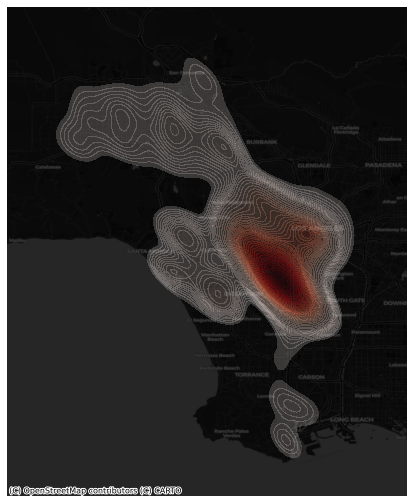

In [23]:
##perform a heat map for black descent
data_black = df[df.Victim_Descent.isin(['Black'])]
f, ax = plt.subplots(1, figsize=(9, 9))

sns.kdeplot(x = data_black.Longitude, 
            y = data_black.Latitude,
            n_levels=50, 
            shade=True,
            thresh=0.05,
            alpha=0.2, 
            cmap='Reds')
ax.axis('off')
ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.CartoDB.DarkMatter)

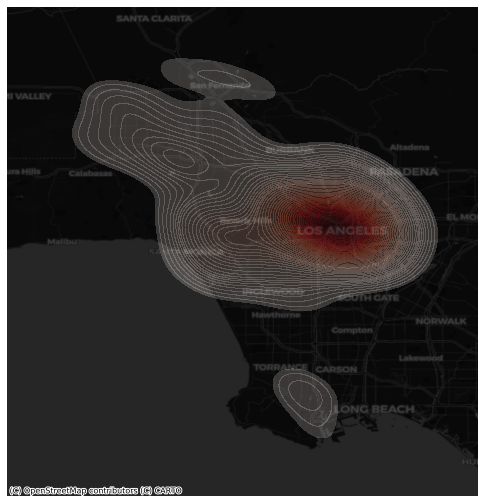

In [24]:
##perform a heat map for chinese descent
data_chinese = df[df.Victim_Descent.isin(['Chinese'])]
f, ax = plt.subplots(1, figsize=(9, 9))

sns.kdeplot(x = data_chinese.Longitude, 
            y = data_chinese.Latitude,
            n_levels=50, 
            shade=True,
            thresh=0.05,
            alpha=0.2, 
            cmap='Reds')
ax.axis('off')
ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.CartoDB.DarkMatter)

In [25]:
##find mean and median centers
mean_center = centrography.mean_center(df[['Longitude','Latitude']])
med_center = centrography.euclidean_median(df[['Longitude','Latitude']])

In [26]:
mean_center

array([-118.36070048,   34.07967036])

In [27]:
med_center

array([-118.3334906 ,   34.06441279])

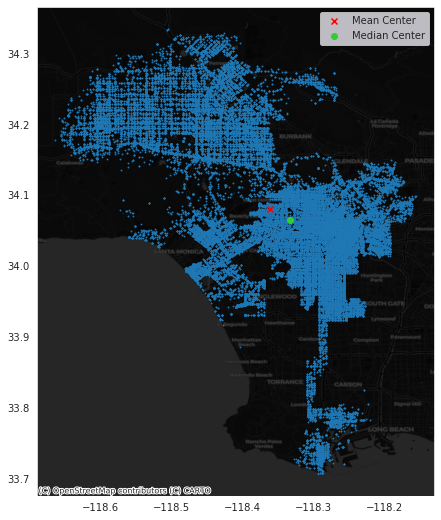

In [28]:
sns.set_style('dark')
f, ax = plt.subplots(1, figsize=(9, 9))

##plot the mean center and median center
ax.scatter(df['Longitude'], df['Latitude'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

ax.legend()

##add a basemap
ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.CartoDB.DarkMatter)
#Display
plt.show()

In [29]:
@interact
def traffic_collision_ellipse(area=df.Area_Name.unique().tolist(),
                  race=df.Victim_Descent.unique().tolist()):
    
    # filter the data by race and area name
    collisions_filtered = df[(df.Victim_Descent == race)&(df.Area_Name== area)]

    # mean center and median
    mean_center = centrography.mean_center(collisions_filtered[['Longitude','Latitude']])
    med_center = centrography.euclidean_median(collisions_filtered[['Longitude','Latitude']])

    # standard ellipse
    major, minor, rotation = centrography.ellipse(collisions_filtered[['Longitude','Latitude']])

    # Set up figure and axis
    f, ax = plt.subplots(1, figsize=(9, 9))

    # plot traffic collisions points
    ax.scatter(collisions_filtered['Longitude'], collisions_filtered['Latitude'], s=0.75)

    # add the mean and median center points
    ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
    ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

    # heatmap
    sns.kdeplot(x = collisions_filtered.geometry.x, 
                y = collisions_filtered.geometry.y,
                n_levels=20, 
                shade=False,
                thresh=0.1,
                alpha=0.3, 
                cmap='Reds', 
                ax=ax)

    # Construct the standard ellipse using matplotlib
    ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                      width=major*2, # centrography.ellipse db_filtered
                      height=minor*2, 
                      angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                      facecolor='none', 
                      edgecolor='red', linestyle='--',
                      label='Std. Ellipse')

    ax.add_patch(ellipse)

    ax.legend()

    ax.axis('Off')

    ax.set_title(str(len(collisions_filtered)) + ' incidents of traffic collisions with reported victim descent "' + race + '"')

    # add a basemap
    ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.CartoDB.DarkMatter)
    # Display
    plt.show()

interactive(children=(Dropdown(description='area', options=('Wilshire', 'Newton', 'Pacific', 'West LA', 'Footh…

## Map's Interpretation
We can see that different races have a different heat map of where their traffic collisions occur. We can see that broadly that Central and Eastern L.A. County have a high concentration of traffic collisions regardless of race (for example: White, Black, Chinese)

The specific mean center of where traffic collisions occur is at 34.07967036, -118.36070048. This point is located in Fairfax, which generally agrees with the conclusion above. 

Specifically, the neighborhood with the highest rate of traffic collisions is Downtown Los Angeles.

## Contribution:
    Karen: did all work in the Pre-COVID notebook
    Natalie: did all work in the COVID notebook